In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft,fftfreq,fftshift
from IPython.display import Audio
from scipy.io import wavfile

In [2]:
f_sample=44000

#load audio
fs, ys = wavfile.read("./audio/test.wav")

#create noise
mean = 0
std = 1 
num_samples = 266240
t=np.linspace(0,5,num_samples)
noise1 = 500*(np.sin(2*np.pi*8000*t)+np.sin(2*np.pi*7000*t)+np.sin(2*np.pi*6000*t)+np.sin(2*np.pi*10000*t))
#noise2 = 5000*np.random.normal(mean, std, size=num_samples)

#add noise to audio
s=ys.T[0]+noise1

<function matplotlib.pyplot.show(*args, **kw)>

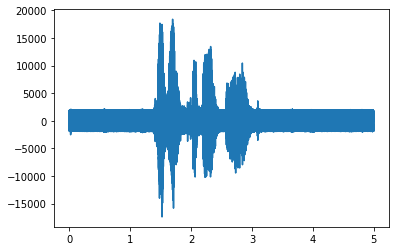

In [3]:
#plot signal with noise in time domain
plt.plot(t,s)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

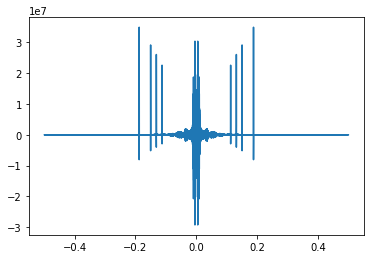

In [4]:
#plot signal with noise in frequency domain
xf = fftfreq(266240, 1)
fft_s=(fft(s))
plt.plot(xf,fft_s)
plt.show

In [5]:
# listen to audio with noise
Audio(s, rate = fs)

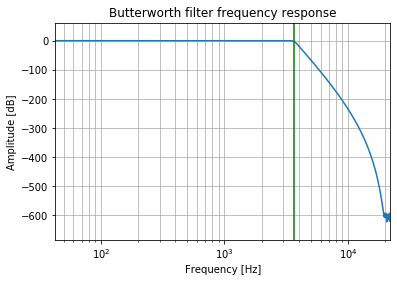

In [6]:
# design filter

f_pass = 3500
f_stop = 5000
wp = f_pass/(f_sample/2)
ws = f_stop/(f_sample/2)
g_pass = 0.5
g_stop = 65
Td = 1

omega_p = (2/Td)*np.tan(wp*Td/2)
omega_s = (2/Td)*np.tan(ws*Td/2)
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop,
                       analog=False)

b, a = signal.butter(N, Wn, 'low', False)
w, h = signal.freqz(b, a, 512)

plt.semilogx(w*f_sample/(2*math.pi), 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(Wn*f_sample/2, color='green')
plt.show()

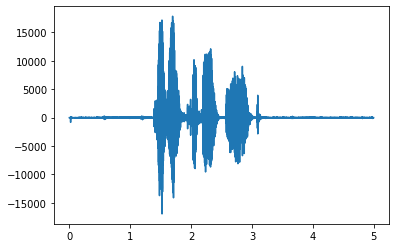

In [7]:
#apply filter on signal
output = signal.filtfilt(b, a, s)

#plot filtered signal
plt.plot(t,output)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

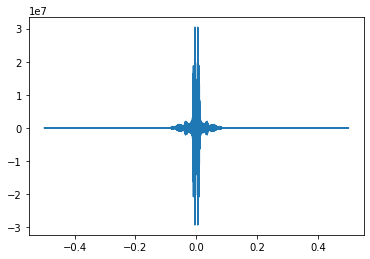

In [8]:
#plot filtered signal in frequency domain
f = np.linspace(-f_sample/2,f_sample/2-1,44000)
xf = fftfreq(266240, Td)
fft_output=(fft(output))
plt.plot(xf,fft_output)
plt.show

In [9]:
# listen to filtered signal
Audio(output, rate = fs)